Importing:

In [2]:
import json
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for training.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU for training.")

Using GPU for training.


In [4]:
%run "src/dataloading.ipynb"
%run "src/training.ipynb"
%run "src/evaluate.ipynb"
%run "src/visualizations.ipynb"
%run "model_architectures.ipynb"

Data loaded and split into training, validation and testing datasets


Training:

In [5]:
def update_current_model(json_file, new_model_name):
    # Load the JSON data from the file
    with open(json_file, 'r') as file:
        data = json.load(file)

    # Update the current-model value
    data['current-model'] = new_model_name

    # Save the updated JSON data back to the file
    with open(json_file, 'w') as file:
        json.dump(data, file, indent=4)
json_file_path = 'configs/model_configs.json'
new_model_name = 'ResNet'
update_current_model(json_file_path, new_model_name)

In [6]:

model_config_file = open('configs/model_configs.json')
model_configs = json.load(model_config_file)
current_model_configs = model_configs[model_configs['current-model']]

epochs = current_model_configs['epoch-count']

match model_configs['current-model']:
    case 'ResNet':
        model = MRI_ResNet
match current_model_configs['loss-function']:
    case 'cross-entropy':
        criterion = nn.CrossEntropyLoss()
    case _:
        criterion = nn.CrossEntropyLoss()
match current_model_configs['optimizer']:
    case 'adam':
        optimizer = optim.Adam
    case 'adamW':
        optimizer = optim.AdamW
    case _:
        optimizer = optim.Adam

model = model(**current_model_configs['model-hyperparameters']).to(device)
optimizer = optimizer(model.parameters(), lr=current_model_configs['optimizer-lr'])

Training and Testing Scratch ResNet:

In [7]:
training_losses = []
validation_losses = []
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_set, val_set = torch.utils.data.random_split(training_set, [1 - val_ratio, val_ratio])
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size,shuffle=True)

    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)
    training_losses.append(train_loss)
    validation_losses.append(val_loss)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )


Training:   5%|▌         | 1/20 [00:13<04:13, 13.33s/epoch]

Epoch [1/20] Train Loss: 0.9965 Train Accuracy: 60.64% Validation Loss: 2.2533 Validation Accuracy: 37.16%


Training:  10%|█         | 2/20 [00:25<03:52, 12.92s/epoch]

Epoch [2/20] Train Loss: 0.5907 Train Accuracy: 78.03% Validation Loss: 1.2372 Validation Accuracy: 65.59%


Training:  15%|█▌        | 3/20 [00:38<03:37, 12.81s/epoch]

Epoch [3/20] Train Loss: 0.3072 Train Accuracy: 90.31% Validation Loss: 1.1842 Validation Accuracy: 64.62%


Training:  20%|██        | 4/20 [00:51<03:23, 12.72s/epoch]

Epoch [4/20] Train Loss: 0.1502 Train Accuracy: 95.85% Validation Loss: 1.2057 Validation Accuracy: 68.66%


Training:  25%|██▌       | 5/20 [01:03<03:09, 12.64s/epoch]

Epoch [5/20] Train Loss: 0.1117 Train Accuracy: 97.58% Validation Loss: 0.5692 Validation Accuracy: 80.78%


Training:  30%|███       | 6/20 [01:16<02:56, 12.62s/epoch]

Epoch [6/20] Train Loss: 0.0829 Train Accuracy: 98.12% Validation Loss: 0.5747 Validation Accuracy: 82.55%


Training:  35%|███▌      | 7/20 [01:28<02:43, 12.61s/epoch]

Epoch [7/20] Train Loss: 0.0541 Train Accuracy: 98.98% Validation Loss: 0.5687 Validation Accuracy: 79.48%


Training:  40%|████      | 8/20 [01:41<02:30, 12.57s/epoch]

Epoch [8/20] Train Loss: 0.0402 Train Accuracy: 99.89% Validation Loss: 0.4993 Validation Accuracy: 83.36%


Training:  45%|████▌     | 9/20 [01:53<02:18, 12.56s/epoch]

Epoch [9/20] Train Loss: 0.0596 Train Accuracy: 99.68% Validation Loss: 0.5135 Validation Accuracy: 84.33%


Training:  50%|█████     | 10/20 [02:06<02:05, 12.57s/epoch]

Epoch [10/20] Train Loss: 0.0311 Train Accuracy: 99.89% Validation Loss: 0.4785 Validation Accuracy: 86.11%


Training:  55%|█████▌    | 11/20 [02:19<01:53, 12.56s/epoch]

Epoch [11/20] Train Loss: 0.0182 Train Accuracy: 100.00% Validation Loss: 0.5760 Validation Accuracy: 82.71%


Training:  60%|██████    | 12/20 [02:31<01:40, 12.58s/epoch]

Epoch [12/20] Train Loss: 0.0156 Train Accuracy: 99.95% Validation Loss: 0.6950 Validation Accuracy: 79.64%


Training:  65%|██████▌   | 13/20 [02:44<01:28, 12.58s/epoch]

Epoch [13/20] Train Loss: 0.0476 Train Accuracy: 99.95% Validation Loss: 0.4570 Validation Accuracy: 85.46%


Training:  70%|███████   | 14/20 [02:56<01:15, 12.56s/epoch]

Epoch [14/20] Train Loss: 0.0372 Train Accuracy: 99.78% Validation Loss: 0.5972 Validation Accuracy: 82.23%


Training:  75%|███████▌  | 15/20 [03:09<01:02, 12.55s/epoch]

Epoch [15/20] Train Loss: 0.1304 Train Accuracy: 96.02% Validation Loss: 3.0451 Validation Accuracy: 53.31%


Training:  80%|████████  | 16/20 [03:21<00:50, 12.55s/epoch]

Epoch [16/20] Train Loss: 0.2513 Train Accuracy: 91.98% Validation Loss: 0.9673 Validation Accuracy: 70.60%


Training:  85%|████████▌ | 17/20 [03:34<00:37, 12.57s/epoch]

Epoch [17/20] Train Loss: 0.1140 Train Accuracy: 97.15% Validation Loss: 0.9143 Validation Accuracy: 73.02%


Training:  90%|█████████ | 18/20 [03:47<00:25, 12.61s/epoch]

Epoch [18/20] Train Loss: 0.0659 Train Accuracy: 99.08% Validation Loss: 0.5418 Validation Accuracy: 83.36%


Training:  95%|█████████▌| 19/20 [03:59<00:12, 12.66s/epoch]

Epoch [19/20] Train Loss: 0.0326 Train Accuracy: 99.84% Validation Loss: 0.4568 Validation Accuracy: 85.46%


Training: 100%|██████████| 20/20 [04:12<00:00, 12.63s/epoch]

Epoch [20/20] Train Loss: 0.0415 Train Accuracy: 99.89% Validation Loss: 0.4666 Validation Accuracy: 85.78%


In [8]:
test_losses = []
test_accuracies = []
for epoch in tqdm(range(epochs), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss, test_accuracy, test_labels, test_preds = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss:.4f} "
        f"Test Accuracy: {test_accuracy * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:   5%|▌         | 1/20 [00:01<00:30,  1.62s/epoch]

Testing Epoch [1/20] Test Loss: 0.4272 Test Accuracy: 88.87% Time per Epoch: 1.62 seconds


Testing:  10%|█         | 2/20 [00:03<00:28,  1.58s/epoch]

Testing Epoch [2/20] Test Loss: 0.4328 Test Accuracy: 88.87% Time per Epoch: 1.55 seconds


Testing:  15%|█▌        | 3/20 [00:04<00:26,  1.58s/epoch]

Testing Epoch [3/20] Test Loss: 0.4176 Test Accuracy: 88.87% Time per Epoch: 1.58 seconds


Testing:  20%|██        | 4/20 [00:06<00:25,  1.57s/epoch]

Testing Epoch [4/20] Test Loss: 0.4300 Test Accuracy: 88.87% Time per Epoch: 1.57 seconds


Testing:  25%|██▌       | 5/20 [00:07<00:23,  1.57s/epoch]

Testing Epoch [5/20] Test Loss: 0.4356 Test Accuracy: 88.87% Time per Epoch: 1.56 seconds


Testing:  30%|███       | 6/20 [00:09<00:21,  1.57s/epoch]

Testing Epoch [6/20] Test Loss: 0.4198 Test Accuracy: 88.87% Time per Epoch: 1.55 seconds


Testing:  35%|███▌      | 7/20 [00:11<00:20,  1.57s/epoch]

Testing Epoch [7/20] Test Loss: 0.4445 Test Accuracy: 88.87% Time per Epoch: 1.57 seconds


Testing:  40%|████      | 8/20 [00:12<00:18,  1.57s/epoch]

Testing Epoch [8/20] Test Loss: 0.4249 Test Accuracy: 88.87% Time per Epoch: 1.56 seconds


Testing:  45%|████▌     | 9/20 [00:14<00:17,  1.56s/epoch]

Testing Epoch [9/20] Test Loss: 0.4314 Test Accuracy: 88.87% Time per Epoch: 1.55 seconds


Testing:  50%|█████     | 10/20 [00:15<00:15,  1.56s/epoch]

Testing Epoch [10/20] Test Loss: 0.4233 Test Accuracy: 88.87% Time per Epoch: 1.54 seconds


Testing:  55%|█████▌    | 11/20 [00:17<00:13,  1.55s/epoch]

Testing Epoch [11/20] Test Loss: 0.4542 Test Accuracy: 88.87% Time per Epoch: 1.55 seconds


Testing:  60%|██████    | 12/20 [00:18<00:12,  1.56s/epoch]

Testing Epoch [12/20] Test Loss: 0.4236 Test Accuracy: 88.87% Time per Epoch: 1.57 seconds


Testing:  65%|██████▌   | 13/20 [00:20<00:10,  1.56s/epoch]

Testing Epoch [13/20] Test Loss: 0.4199 Test Accuracy: 88.87% Time per Epoch: 1.57 seconds


Testing:  70%|███████   | 14/20 [00:21<00:09,  1.57s/epoch]

Testing Epoch [14/20] Test Loss: 0.4181 Test Accuracy: 88.87% Time per Epoch: 1.59 seconds


Testing:  75%|███████▌  | 15/20 [00:23<00:07,  1.57s/epoch]

Testing Epoch [15/20] Test Loss: 0.4316 Test Accuracy: 88.87% Time per Epoch: 1.56 seconds


Testing:  80%|████████  | 16/20 [00:25<00:06,  1.57s/epoch]

Testing Epoch [16/20] Test Loss: 0.4181 Test Accuracy: 88.87% Time per Epoch: 1.58 seconds


Testing:  85%|████████▌ | 17/20 [00:26<00:04,  1.57s/epoch]

Testing Epoch [17/20] Test Loss: 0.4232 Test Accuracy: 88.87% Time per Epoch: 1.58 seconds


Testing:  90%|█████████ | 18/20 [00:28<00:03,  1.57s/epoch]

Testing Epoch [18/20] Test Loss: 0.4218 Test Accuracy: 88.87% Time per Epoch: 1.56 seconds


Testing:  95%|█████████▌| 19/20 [00:29<00:01,  1.57s/epoch]

Testing Epoch [19/20] Test Loss: 0.4296 Test Accuracy: 88.87% Time per Epoch: 1.57 seconds


Testing: 100%|██████████| 20/20 [00:31<00:00,  1.57s/epoch]

Testing Epoch [20/20] Test Loss: 0.4477 Test Accuracy: 88.87% Time per Epoch: 1.61 seconds
Average Test Loss: 0.4287
Average Test Accuracy: 88.87%


Model Classification Model 1:

              precision    recall  f1-score   support

           0       0.92      0.83      0.88       186
           1       0.84      0.85      0.85       178
           2       0.85      0.97      0.90        87
           3       0.92      0.95      0.94       169

    accuracy                           0.89       620
   macro avg       0.89      0.90      0.89       620
weighted avg       0.89      0.89      0.89       620



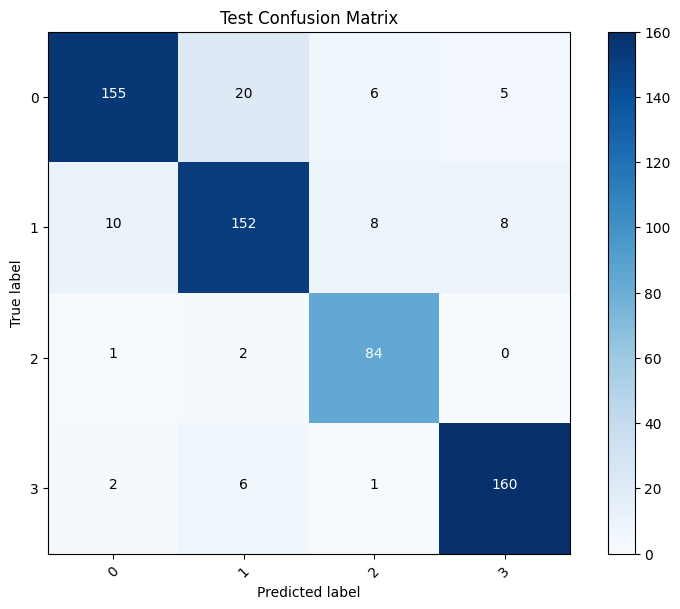

In [9]:
confusion_train = confusion_matrix(train_labels, train_preds)
confusion_val = confusion_matrix(val_labels, val_preds)
confusion_test = confusion_matrix(test_labels, test_preds)

# print(classification_report(train_labels, train_preds))
# print(classification_report(val_labels, val_preds))
print(classification_report(test_labels, test_preds))

class_names = [str(i) for i in range(NUM_CLASSES)]  # Update with your class names
# plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
# plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()

ROC Curver for Scratch ResNet:

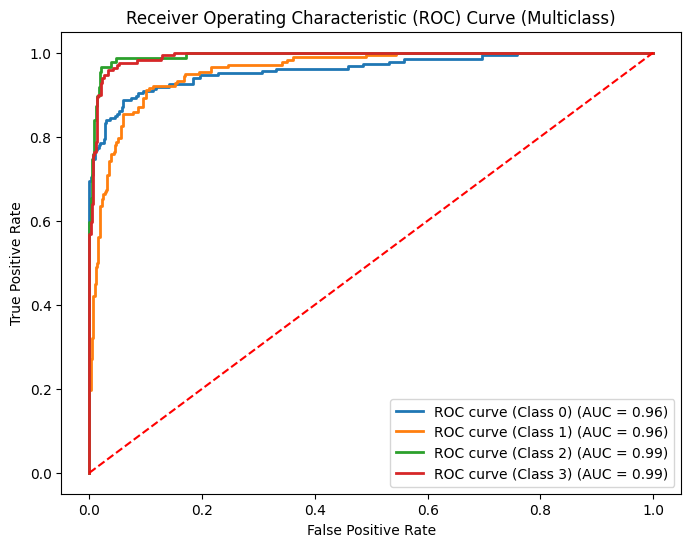

In [10]:
plot_auc_curve_multiclass(model,test_loader,4)

Training and Testing PreBuilt ResNet:

In [11]:
update_current_model(json_file_path, "ResNet-Pre")
model_config_file = open('configs/model_configs.json')
model_configs = json.load(model_config_file)
current_model_configs = model_configs[model_configs['current-model']]

epochs = current_model_configs['epoch-count']

match model_configs['current-model']:
    case 'ResNet-Pre':
        model = MRI_Pretrained_ResNet
match current_model_configs['loss-function']:
    case 'cross-entropy':
        criterion = nn.CrossEntropyLoss()
    case _:
        criterion = nn.CrossEntropyLoss()
match current_model_configs['optimizer']:
    case 'adam':
        optimizer = optim.Adam
    case 'adamW':
        optimizer = optim.AdamW
    case _:
        optimizer = optim.Adam

model = model(**current_model_configs['model-hyperparameters']).to(device)
optimizer = optimizer(model.parameters(), lr=current_model_configs['optimizer-lr'])

In [12]:
training_losses = []
validation_losses = []
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_set, val_set = torch.utils.data.random_split(training_set, [1 - val_ratio, val_ratio])
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size,shuffle=True)

    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)
    training_losses.append(train_loss)
    validation_losses.append(val_loss)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )

Training:  10%|█         | 1/10 [04:01<36:15, 241.77s/epoch]

Epoch [1/10] Train Loss: 0.9836 Train Accuracy: 69.20% Validation Loss: 0.6946 Validation Accuracy: 79.32%


Training:  20%|██        | 2/10 [07:38<30:14, 226.79s/epoch]

Epoch [2/10] Train Loss: 0.4452 Train Accuracy: 88.69% Validation Loss: 0.3449 Validation Accuracy: 89.82%


Training:  30%|███       | 3/10 [11:13<25:51, 221.70s/epoch]

Epoch [3/10] Train Loss: 0.2027 Train Accuracy: 96.77% Validation Loss: 0.2304 Validation Accuracy: 92.89%


Training:  40%|████      | 4/10 [14:50<21:57, 219.60s/epoch]

Epoch [4/10] Train Loss: 0.0999 Train Accuracy: 98.98% Validation Loss: 0.2038 Validation Accuracy: 93.86%


Training:  50%|█████     | 5/10 [18:25<18:11, 218.24s/epoch]

Epoch [5/10] Train Loss: 0.0606 Train Accuracy: 99.73% Validation Loss: 0.2178 Validation Accuracy: 94.51%


Training:  60%|██████    | 6/10 [22:01<14:29, 217.31s/epoch]

Epoch [6/10] Train Loss: 0.0389 Train Accuracy: 99.95% Validation Loss: 0.1955 Validation Accuracy: 93.05%


Training:  70%|███████   | 7/10 [25:36<10:49, 216.63s/epoch]

Epoch [7/10] Train Loss: 0.0301 Train Accuracy: 99.95% Validation Loss: 0.2002 Validation Accuracy: 93.38%


Training:  80%|████████  | 8/10 [29:12<07:12, 216.29s/epoch]

Epoch [8/10] Train Loss: 0.0251 Train Accuracy: 99.95% Validation Loss: 0.2005 Validation Accuracy: 93.70%


Training:  90%|█████████ | 9/10 [32:46<03:35, 215.69s/epoch]

Epoch [9/10] Train Loss: 0.0351 Train Accuracy: 99.95% Validation Loss: 0.1998 Validation Accuracy: 94.83%


Training: 100%|██████████| 10/10 [36:28<00:00, 218.84s/epoch]

Epoch [10/10] Train Loss: 0.0226 Train Accuracy: 99.95% Validation Loss: 0.2077 Validation Accuracy: 94.18%


In [13]:
test_losses2 = []
test_accuracies2 = []
for epoch in tqdm(range(epochs), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss2, test_accuracy2, test_label2, test_preds2 = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses2.append(test_loss2)
    test_accuracies2.append(test_accuracy2)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss2:.4f} "
        f"Test Accuracy: {test_accuracy2 * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses2) / len(test_losses2)
avg_test_accuracy = sum(test_accuracies2) / len(test_accuracies2)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:  10%|█         | 1/10 [00:05<00:49,  5.52s/epoch]

Testing Epoch [1/10] Test Loss: 0.2462 Test Accuracy: 92.42% Time per Epoch: 5.52 seconds


Testing:  20%|██        | 2/10 [00:10<00:43,  5.48s/epoch]

Testing Epoch [2/10] Test Loss: 0.2435 Test Accuracy: 92.42% Time per Epoch: 5.44 seconds


Testing:  30%|███       | 3/10 [00:15<00:36,  5.23s/epoch]

Testing Epoch [3/10] Test Loss: 0.2427 Test Accuracy: 92.42% Time per Epoch: 4.93 seconds


Testing:  40%|████      | 4/10 [00:20<00:29,  4.96s/epoch]

Testing Epoch [4/10] Test Loss: 0.2523 Test Accuracy: 92.42% Time per Epoch: 4.55 seconds


Testing:  50%|█████     | 5/10 [00:25<00:24,  4.81s/epoch]

Testing Epoch [5/10] Test Loss: 0.2617 Test Accuracy: 92.42% Time per Epoch: 4.54 seconds


Testing:  60%|██████    | 6/10 [00:29<00:18,  4.68s/epoch]

Testing Epoch [6/10] Test Loss: 0.2495 Test Accuracy: 92.42% Time per Epoch: 4.41 seconds


Testing:  70%|███████   | 7/10 [00:33<00:13,  4.61s/epoch]

Testing Epoch [7/10] Test Loss: 0.2444 Test Accuracy: 92.42% Time per Epoch: 4.47 seconds


Testing:  80%|████████  | 8/10 [00:38<00:09,  4.56s/epoch]

Testing Epoch [8/10] Test Loss: 0.2494 Test Accuracy: 92.42% Time per Epoch: 4.46 seconds


Testing:  90%|█████████ | 9/10 [00:42<00:04,  4.55s/epoch]

Testing Epoch [9/10] Test Loss: 0.2526 Test Accuracy: 92.42% Time per Epoch: 4.51 seconds


Testing: 100%|██████████| 10/10 [00:47<00:00,  4.78s/epoch]

Testing Epoch [10/10] Test Loss: 0.2430 Test Accuracy: 92.42% Time per Epoch: 4.92 seconds
Average Test Loss: 0.2485
Average Test Accuracy: 92.42%


Model Classification for Model 2:

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       186
           1       0.91      0.87      0.89       178
           2       0.91      1.00      0.95        87
           3       0.94      0.99      0.96       169

    accuracy                           0.92       620
   macro avg       0.92      0.94      0.93       620
weighted avg       0.92      0.92      0.92       620



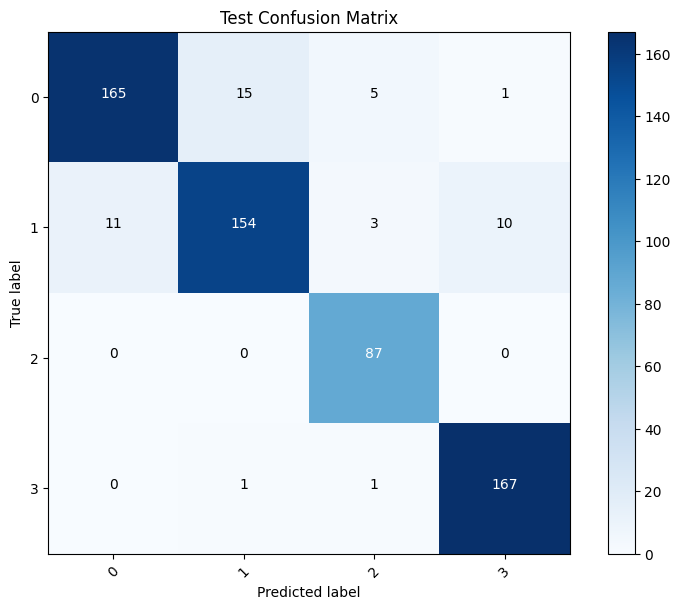

In [14]:
confusion_train = confusion_matrix(train_labels2, train_preds2)
confusion_val = confusion_matrix(val_labels2, val_preds2)
confusion_test = confusion_matrix(test_label2, test_preds2)

# print(classification_report(train_labels2, train_preds2))
# print(classification_report(val_labels2, val_preds2))
print(classification_report(test_label2, test_preds2))

class_names = [str(i) for i in range(NUM_CLASSES)]  # Update with your class names
# plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
# plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()

ROC Curve for PreBuilt Resnet:

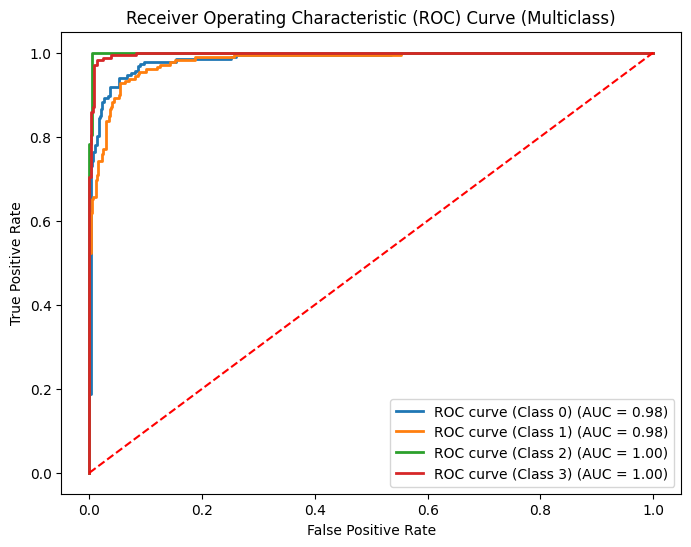

In [15]:
plot_auc_curve_multiclass(model,test_loader,4)